# Assignment 1: Decision Trees and Nearest Neighbor Classification
 
In this assignment you will explore the use of decision trees and nearest neighbor classifiers to learn morphological classes. You will make use of standard implementations of these classifiers in scikit learn.
 
Provided are two word morphology data sets describing the formation of inflected word forms from lemma information for the plural forms of German nouns (german_plural.arff) and the past tense forms of English verbs (english_past_tense.arff), respectively. You will evaluate two classifiers, decision trees and k nearest neighbours, for predicting the class from test data.

The data is in the arff format, which is the standard format of the machine learning package Weka, and more or less self-explanatory. If you want to know more about the format, consult the Weka documentation (https://www.cs.waikato.ac.nz/ml/weka/).

The files can be downloaded from the student portal or from the given urls.

In [15]:
data_urls = ["""https://cl.lingfil.uu.se/~frewa417/english_past_tense.arff""", """https://cl.lingfil.uu.se/~frewa417/german_plural.arff"""]

filenames = [url.split("/")[-1] for url in data_urls]

import urllib.request
for url, fn in zip(data_urls, filenames):
  urllib.request.urlretrieve(url, fn)

The two data files should now be downloaded. We can see if this is the case by running a shell command.

In [16]:
!ls

Assignment_1.ipynb      english_past_tense.arff past tense.pdf
ML_lab_1.ipynb          german_plural.arff
ML_lab_1_new.ipynb      past tense


## Data Exploration

Your first task is to get acquainted with the data sets.


The first data set contains 25168 instances, each of which is a German noun lemma, and that each instance has 9 attributes, of which the class attributes encode the plural formation of the noun and is the attribute that we want to learn to predict. The attribute **frequency** records corpus frequency, the attribute **gender** represents the gender of the noun, and the attributes **p1-p6** give a phonological representation of the last two syllables of the base form. Specifically, p1, p2 and p3 represent the onset, nucleus and coda of the penultimate syllable, and p4, p5 and p6 those of the ultimate syllable. By selecting different attributes, you can inspect their type, value set and distribution in the data set.

Next the *English past tense data set*, which consists of 4330 verb lemmas and where the class to predict is the past tense formation rule. Attributes are similar to the ones found in the German data set, except that the phonological representation covers the last three syllables (p1-p3: antepenultimate, p4-p6: penultimate, p7-p9: ultimate) and that there is no gender attribute.

The data files are in an uncompressed text format. The first part describes the data (note that all features are categorical) and the second part is the data points. We can look at the first 20 lines of both files using the **head** shell command.

In [17]:
!head -n20 german_plural.arff

@relation plural
@attribute frequency NUMERIC
@attribute p1 {+, +l, +r, -, =, =l, =v, J, N, S, Sl, Sm, Sn, Sp, Spl, Spr, Sr, St, Str, Sv, Z, _, b, bl, br, d, dl, dm, dn, dr, f, fl, fr, g, gl, gm, gn, gr, h, j, k, kl, kn, kr, ks, kv, l, m, n, p, pj, pl, pn, pr, ps, pt, r, s, s=, sf, sk, skl, skr, sl, sm, sp, st, stj, str, sv, t, tl, tn, tr, v, vj, x, z}
@attribute p2 {#, &, ), -, /, 0, 1, 2, 6, @, B, E, I, O, U, W, X, Y, a, e, i, o, q, u, y, |, ~}
@attribute p3 {+, -, =, =t, J, N, Nk, Nkt, Ns, Nst, Nt, S, d, f, f=, fs, ft, k, ks, kst, kt, l, l=, lS, lf, lfs, lk, lks, lm, lp, lps, lpst, ls, lst, lt, lx, m, m+, m=, mf, mp, ms, mt, n, n=, nJ, nS, nd, nf, nf=, nft, ns, nst, nt, ntl, nx, p, ps, pst, pt, r, r=, rS, rf, rk, rkt, rl, rm, rn, rnst, rp, rpst, rs, rst, rt, rx, s, sp, st, t, x, x=, xs, xst, xt}
@attribute p4 {+, +l, +r, -, =, =l, =v, J, N, Nl, S, Sl, Sm, Sn, Sp, Spl, Spr, Sr, St, Str, Sv, Z, _, _m, b, bl, br, d, dl, dn, dr, f, fj, fl, fr, ft, g, gl, gm, gn, gr, h, j, k, kl, kn, kr,

In [20]:
!head -n20 english_past_tense.arff

@relation past-tense
@attribute frequency NUMERIC
@attribute p1 {=, @, &, 3:, A:, aI, aU, b, bj, bl, bl#, br, d, D, dj, dl#, dn#, dr, dw, dZ, E, E@, eI, f, fj, fl, fl#, fn#, fr, ft, g, gj, gl, gl#, gr, gw, h, hj, i:, I, I@, j, k, kj, kl, kl#, kr, ks, kt, kw, l, ld, ldZ, lf, lj, lk, lm, lp, lpt, ls, lS, lt, ltS, lv, m, mf, mj, ml#, mp, mps, mpt, n, N, nd, ndZ, nj, Nk, nl#, ns, nt, ntS, nz, O, O:, OI, p, pj, pl, pl#, pr, ps, pt, r, r*, s, S, sj, sk, skj, skl, skr, skw, sl, sl#, Sl#, sm, sn, sn#, Sn#, sp, spj, spl, spr, Sr, st, stj, str, sw, t, T, tj, Tj, tl#, tn#, Tn#, tr, Tr, ts, tS, tSr, tw, Tw, u:, U, @U, U@, v, V, vj, vl#, vn#, vz, w, z, Z, zj, zl#, zn#, Zn#}
@attribute p2 {=, @, &, 3:, A:, aI, aU, b, bj, bl, bl#, br, d, D, dj, dl#, dn#, dr, dw, dZ, E, E@, eI, f, fj, fl, fl#, fn#, fr, ft, g, gj, gl, gl#, gr, gw, h, hj, i:, I, I@, j, k, kj, kl, kl#, kr, ks, kt, kw, l, ld, ldZ, lf, lj, lk, lm, lp, lpt, ls, lS, lt, ltS, lv, m, mf, mj, ml#, mp, mps, mpt, n, N, nd, ndZ, nj, Nk, nl#, ns, n

Loading the data files can be done using scipy.

In [18]:
from scipy.io.arff import loadarff
loaded_data_files = [loadarff(fn) for fn in filenames]

Now you have the data in memory. However, it needs to be re-formated to fit sklearn.

In [2]:
import numpy as np

D = dict()
for data in loaded_data_files:
  data_points = data[0]
  field_names = data[1].names()
  assert field_names[0] == 'frequency'
  assert field_names[-1] == 'class'
  X = list()
  y = list()
  for point in data_points:
    v = [field_names[i]+"_"+point[i].decode("utf-8") for i in range(1, len(point)-1)]
    X.extend([v]*int(point[0]))
    assert len(v) == len(X[0])
    u = [point[-1].decode("utf-8")]
    y.extend([u]*int(point[0]))
    assert len(u) == len(y[0])
  assert len(X) == np.sum(np.asarray([point[0] for point in data_points]))
  X_orig = np.asarray(X)
  y_orig = np.asarray(y).ravel()
  D[data[1].name] = tuple([X_orig, y_orig])

NameError: name 'loaded_data_files' is not defined

The two data sets are now contained in a dictionary with the following keys.

In [20]:
D.keys()

dict_keys(['past-tense', 'plural'])

Each entry in the dictionary is a tuple (X, y) with categorical features. Note that the features are not yet in a numerical format.

In [23]:
D['past-tense'][0][1]

array(['p1_=', 'p2_@', 'p3_=', 'p4_b', 'p5_&', 'p6_n', 'p7_d', 'p8_@',
       'p9_n'], dtype='<U6')

In [25]:
D['plural']

(array([['p1_l', 'p2_a', 'p3_-', ..., 'p5_U', 'p6_N', 'gender_F'],
        ['p1_l', 'p2_a', 'p3_-', ..., 'p5_U', 'p6_N', 'gender_F'],
        ['p1_l', 'p2_a', 'p3_-', ..., 'p5_U', 'p6_N', 'gender_F'],
        ...,
        ['p1_l', 'p2_e', 'p3_-', ..., 'p5_@', 'p6_n', 'gender_N'],
        ['p1_l', 'p2_e', 'p3_-', ..., 'p5_@', 'p6_n', 'gender_N'],
        ['p1_l', 'p2_e', 'p3_-', ..., 'p5_@', 'p6_n', 'gender_N']],
       dtype='<U9'),
 array(['en', 'en', 'en', ..., '-', '-', '-'], dtype='<U3'))

## Making a space using categorical features

Your first task is to preprocess the data to be able to analyse it with sklearn. The categorical features need to be converted into proper vectors. This can be done using some preprocessing tools from sklearn. The OneHotEncoder will transform a multiple output category into a set of binary feature dimensions. Using this might make the preprocessed feature vectors very long. (Note that older versions of sklearn do not support this.)

```
from sklearn.preprocessing import OneHotEncoder
feature_encoder = OneHotEncoder()
X = feature_encoder.fit_transform(X_orig)
names = feature_encoder.get_feature_names()
```

Doing a similar encoding for the output data can be done using the LabelEncoder. This encodes the output class labels as numbers. Since we're only interested in the classification accuracy, there is no need for long binary vectors here.

```
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_orig)
```

Since this is the first lab in this course, you will be given snippets of code to help you along. To have some data to work with, the wine dataset from sklearn will be used.

In [4]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target
print("X:", X.shape, ", y:", y.shape)


X: (178, 13) , y: (178,)


## Decision Trees

The second task is to induce decision trees for predicting the plural form of a German noun and the past tense form of an English verb. Below, you are given code for how this works for the wine data set.



In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Build decision trees for both language data sets and analyze their performance.

Compare training error to test error and see whether there are signs of overfitting. Also, try out some different choices of hyper parameters (especially for [pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)) and see how this affects the size of the tree as well as the relation between training and test error. Splitting up the data can be done using the following examples. k-fold cross validation splits up the data and allows you to iterate over different training and test set to mitigate the effect of getting a "well chosen" training set by chance.


In [7]:
from sklearn.model_selection import KFold

for train, test in KFold(n_splits=5, shuffle=True).split(X):
  X_train = X[train]
  X_test = X[test]
  y_train = y[train]
  y_test = y[test]
  classifier.fit(X_train, y_train)
  print("Accuracy: %.1f%%" %(100*classifier.score(X_test, y_test)))

Accuracy: 83.3%
Accuracy: 91.7%
Accuracy: 83.3%
Accuracy: 85.7%
Accuracy: 94.3%


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classifier.predict(X_test))

array([[12,  0,  2],
       [ 1,  9,  3],
       [ 0,  1,  8]])


One of the advantages of decision trees, compared to many other learning algorithms, is that the induced classifier can be interpreted as a set of rules for classifying new instances. Visualising these rules is easy using graphviz (this can also be done using only sklearn but not with the same beautiful result).

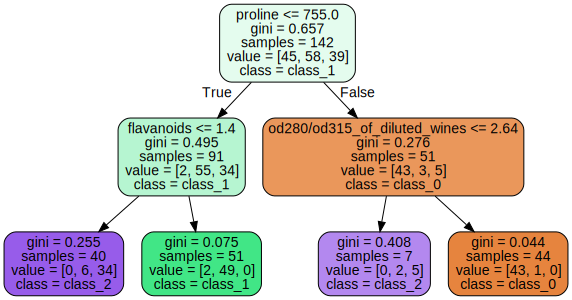

In [13]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier, out_file=None, feature_names=wine.feature_names, 
                           class_names=wine.target_names, filled=True,
                           rounded=True, special_characters=False)
graph = graphviz.Source(dot_data)
#graph.render("wine")
graph

What rules can you find in the trees you have induced? Do they make sense?

**Report:**
1. How accurate are the decision tree classifiers for the two data sets? Look at overall accuracy as well as precision and recall for specific classes.
2. How does training error relate to test error?
3. Can you make sense of the rules implicit in the trees? Consider especially the pruned tree for the English past tense data.

## K-Nearest Neighbor

The third task is to use k-nearest neighbor classification to predict the plural form of a German noun and the past tense form of an English verb.

The training part of a knn is simply storing all the training data points. However, for predicitng a class, all pairwise distances between the training and test set must be calculated. There are lots of ways of getting around this time consuming process. Here, you can simply randomly subsample the data.

In [5]:
import numpy as np
I = np.random.uniform(0, 1, size=X.shape[0]) < .1
X = X[I, :]
y = y[I]
print("X:", X.shape, ", y:", y.shape)
print(I)

X: (14, 13) , y: (14,)
[False False False False False False  True False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False False False False  True False False False False  True
  True False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False Fal

The classifier can be used as follows.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9)

knn.fit(X_train, y_train)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, knn.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5, 0. ]),
 array([1., 0.]),
 array([0.66666667, 0.        ]),
 array([1, 1]))

Compare training error to test error. Vary the number of neighbors used to predict the class and see how this affects training and test error. One of the properties of (simple) nearest neighbor classification is that all features are given equal weight, which means that irrelevant features could hurt classification accuracy. Check whether you can improve accuracy by removing features or reweighting samples. Compare the best accuracy to that obtained with decision trees.

**Report:**
1. How accurate are the nearest neighbor classifiers for the two data sets? Look at overall accuracy as well as precision and recall for specific classes.
2. What is the effect of varying the k parameter? Plot the cross validated accuracy vs increasing k.
3. Can you improve accuracy by removing less informative features?
4. Does k-nearest neighbor perform better or worse than decision trees? Can you force the nearest neighbor classifier to behave like the pruned decision tree on the English past tense data?

**Report:** Which features are most informative for the two data sets? Try to explain why some features are more informative than others.

## VG assignment

The above tasks are sufficient to obtain a pass grade (G) in this assignment. To obtain a pass with distinction (VG), all the assignments must be carried out without major errors, and there is an additional task you should solve.

It is fairly obvious that the performance of a machine learning task depends on the amount of training data that is available, but the amount of data required to reach a certain level of performance in a specific task varies. Your last task is to relate the size of the training data to the performance you can achieve on the two data sets.

Train your classifiers using the best hyperparameters you found for both prediction tasks on a varying amount of training data ranging from just a few examples to the full data set and test the resulting classifiers for each training set size. Do this for both types of classifiers (decision trees
and kNN). Check if you can find a set of hyperparameters that work better for smaller training set size and compare the learning curves. Take a look at the rules in the decision trees for various training set sizes.

**Report:** Describe how you ran these experiments and present the resulting learning curves, both in tabular and in graphical form. Report and discuss any interesting observations you made.

# Submission

You should submit one of the following two options:
1. A written report (3-5 pages) in academic english, reporting and rguing for your conclusions on all tasks. All code must be included in an appentix and be well commented. The report should be submitted through Studentportalen.
**OR**
2. Your cleaned notebook with the relevant code and answers to all the questions. The ipynb-file should be submitted through Studentportalen. The code blocks should reproduce your main findings and be commented either in a text cell or standard code comments.
